In [38]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
p4 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P7_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

{'whiskers': [<matplotlib.lines.Line2D at 0x228a00f2890>,
 'caps': [<matplotlib.lines.Line2D at 0x228a00f73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x228a00f0a50>],
 'medians': [<matplotlib.lines.Line2D at 0x228a00f6610>],
 'fliers': [<matplotlib.lines.Line2D at 0x228a00f42d0>],
 'means': []}

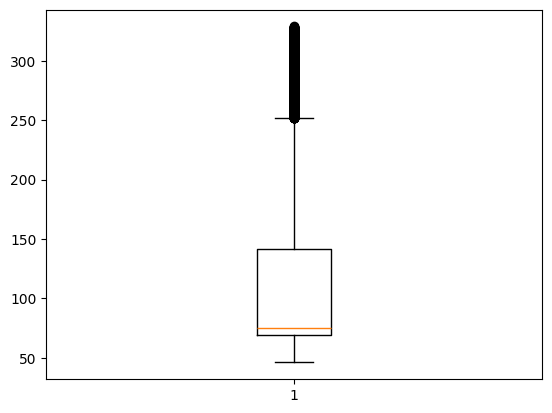

In [40]:
plt.boxplot(p4["RHeel_pos_Z"])

In [41]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
for index, values in p4.iterrows():
    RValue = values["RHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if RValue < 70:
        bValley = False
        for i in range(1,80):
            if frame == 161:
                breakpoint()
            before = p4.loc[frame-i,"RHeel_pos_Z"]
            next = p4.loc[frame+i,"RHeel_pos_Z"]
            if (RValue <= before) and (RValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("R - ", frame, ": ", RValue)
            Rsteps.append([frame,RValue])
    frame += 1

R -  249 :  53.784
R -  372 :  53.94
R -  492 :  49.894
R -  615 :  49.905
R -  734 :  54.369
R -  850 :  57.147
R -  974 :  60.318
R -  1096 :  59.465
R -  1224 :  58.392
R -  1350 :  52.993
R -  1475 :  53.897
R -  1600 :  53.499
R -  1723 :  49.839
R -  1851 :  56.165
R -  1972 :  58.511
R -  2096 :  60.591
R -  2214 :  59.98
R -  2335 :  59.045
R -  2455 :  51.756
R -  2606 :  54.813
R -  2757 :  52.207
R -  2893 :  48.187
R -  3030 :  52.795
R -  3168 :  57.15
R -  3305 :  61.023
R -  3441 :  59.497
R -  3576 :  57.778
R -  3712 :  54.772
R -  3844 :  50.397
R -  3980 :  53.437
R -  4114 :  49.618
R -  4250 :  51.092
R -  4384 :  55.784
R -  4524 :  59.062
R -  4661 :  60.635
R -  4788 :  60.909
R -  4912 :  58.844
R -  5036 :  52.082
R -  5164 :  58.125


R -  5301 :  52.387
R -  5449 :  51.688
R -  5598 :  52.719
R -  5745 :  57.053
R -  5893 :  60.05
R -  6046 :  59.759
R -  6192 :  59.327
R -  6342 :  59.038
R -  6489 :  56.291
R -  6639 :  52.816
R -  6791 :  54.517
R -  6932 :  49.808
R -  7061 :  52.257
R -  7191 :  55.253
R -  7317 :  59.762
R -  7448 :  59.637
R -  7568 :  58.007
R -  7699 :  56.123
R -  7826 :  50.184
R -  7951 :  53.118
R -  8082 :  49.774
R -  8213 :  47.653
R -  8342 :  52.5
R -  8470 :  56.286
R -  8605 :  59.878
R -  8731 :  57.442
R -  8860 :  55.863
R -  8989 :  50.531
R -  9117 :  49.716
R -  9247 :  50.715
R -  9378 :  46.085
R -  9511 :  51.88


In [43]:
#Calculation of left foot steps
LSteps = []
frame = 0
for index, values in p4.iterrows():
    LValue = values["LHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if LValue < 70:
        for i in range(1,80):
            before = p4.loc[frame-i,"LHeel_pos_Z"]
            next = p4.loc[frame+i,"LHeel_pos_Z"]
            if (LValue <= before) and (LValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("L - ", frame, ": ", LValue)
            LSteps.append([frame,LValue])
    frame += 1

L -  215 :  60.239
L -  311 :  42.404
L -  432 :  44.354
L -  554 :  41.194
L -  673 :  44.733
L -  791 :  50.795
L -  912 :  53.342
L -  1035 :  52.216
L -  1160 :  49.808
L -  1285 :  46.777
L -  1410 :  41.784
L -  1537 :  45.389
L -  1661 :  41.338
L -  1786 :  45.349
L -  1910 :  51.641
L -  2033 :  53.463
L -  2155 :  53.258
L -  2272 :  51.928
L -  2395 :  47.095
L -  2519 :  40.722
L -  2690 :  45.026
L -  2823 :  41.284
L -  2964 :  43.901
L -  3098 :  47.95
L -  3239 :  51.368
L -  3373 :  54.039
L -  3509 :  50.838
L -  3644 :  48.875
L -  3779 :  44.212
L -  3913 :  42.731
L -  4049 :  42.933
L -  4182 :  38.514
L -  4318 :  44.738
L -  4452 :  49.488
L -  4595 :  53.151
L -  4726 :  52.238
L -  4850 :  51.609
L -  4973 :  45.949
L -  5094 :  40.908
L -  5223 :  46.609
L -  5376 :  43.37
L -  5523 :  40.832
L -  5672 :  49.241
L -  5819 :  52.161
L -  5969 :  54.062
L -  6119 :  51.682
L -  6270 :  51.503
L -  6415 :  48.705
L -  6563 :  44.973
L -  6716 :  45.796
L -  6866

KeyError: 9675

In [44]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [45]:
steps = pd.DataFrame(steps)
steps

,0,1
0,215,60.239
1,249,53.784
2,311,42.404
3,372,53.940
4,432,44.354
...,...,...
138,9313,39.096
139,9378,46.085
140,9445,42.029
141,9511,51.880


In [46]:
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [47]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [48]:
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [49]:
start_music[start_music[0]=='P7_M2'][1].item()

5070.0

In [50]:
#Update TIme Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+start_music[start_music[0]=='P7_M1'][1].item()
m2[0] = (m2[0]*100)+start_music[start_music[0]=='P7_M2'][1].item()
m3[0] = (m3[0]*100)+start_music[start_music[0]=='P7_M3'][1].item()

In [51]:
m2

,0,1
1,5255.179138,80.7495BPM
2,5329.482993,80.7495BPM
3,5403.786848,80.7495BPM
4,5478.090703,80.7495BPM
5,5554.716553,78.3026BPM
6,5630.181406,79.5072BPM
7,5705.646258,79.5072BPM
8,5781.111111,79.5072BPM
9,5854.253968,82.0313BPM
10,5928.557823,80.7495BPM


(0.0, 9800.0)

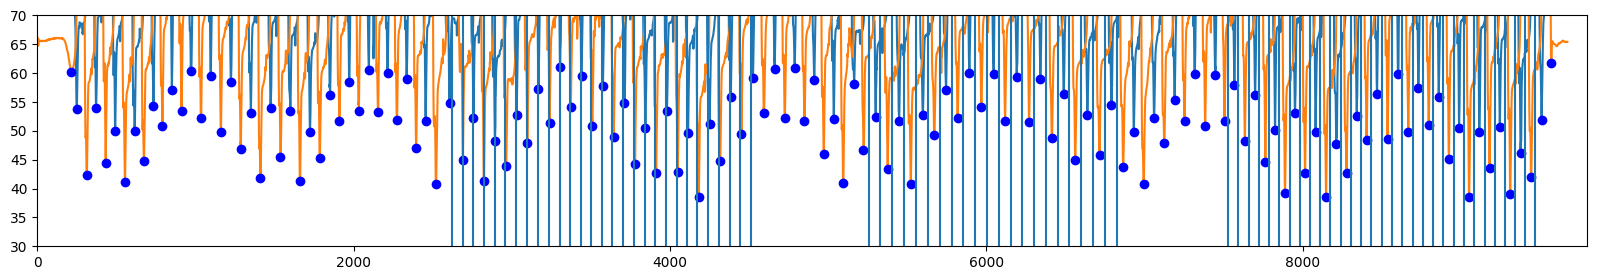

In [52]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim([30, 70])
plt.xlim([0, 9800])

In [53]:
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

85.65694060422244

In [54]:
#ersten 5 Sekunden
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

84.0

# P7 - M1

In [55]:
m1_start = start_music[start_music[0]=='P7_M1'][1].item()
m1_end = start_music[start_music[0]=='P7_M2'][1].item()-500
print(m1_start)
print(m1_end)

2470.0
4570.0


In [56]:
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [ ]:
steps_in_m1_range.count()

37

In [ ]:
beats_in_m1_range.count()

29

In [ ]:
(29/20)*60

87.0

In [ ]:
(34/20)*60

102.0

In [ ]:
beats_in_m1_range

1     2620.349206
2     2688.848073
3     2757.346939
4     2825.845805
5     2892.022676
6     2959.360544
7     3026.698413
8     3096.358277
9     3164.857143
10    3233.356009
11    3301.854875
12    3368.031746
13    3435.369614
14    3502.707483
15    3567.723356
16    3632.739229
17    3701.238095
18    3770.897959
19    3839.396825
20    3907.895692
21    3976.394558
22    4042.571429
23    4107.587302
24    4173.764172
25    4242.263038
26    4309.600907
27    4376.938775
28    4444.276644
29    4511.614513
Name: 0, dtype: float64

In [57]:
#all MUSIC M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100)*60

92.00189916749818

In [ ]:
steps_in_m1_range.count()

34

In [ ]:
steps_in_m1_range.max()-steps_in_m1_range.min()

1866

In [ ]:
(34/(1866/100))*60

109.32475884244373

In [58]:
#all WALKING M1
steps_in_m1_range.count()/((m1_end-m1_start)/100)*60

85.71428571428572

In [59]:
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [60]:
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [61]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100)*60

91.71075837742504

In [62]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100)*60

92.7683246045788

In [ ]:
from statistics import mean
mean(abs(x - y) for x, y in zip(beats_in_m1_range, steps_in_m1_range))

154.73140980344823

In [ ]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(beats_in_m1_range,steps_in_m1_range) 

ValueError: Found input variables with inconsistent numbers of samples: [29, 34]

(2450.0, 4590.0)

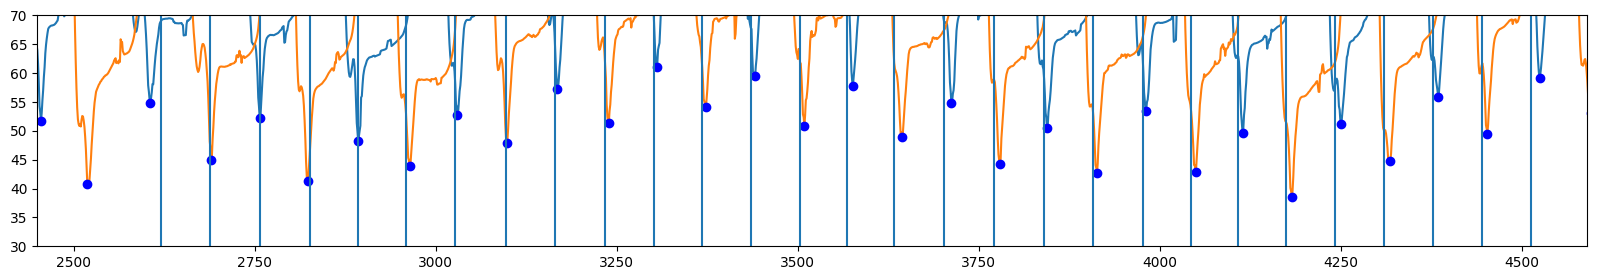

In [63]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.ylim([30, 70])
plt.xlim([m1_start-20, m1_end+20])

# P7 - M2

In [64]:
m2_start = start_music[start_music[0]=='P7_M2'][1].item()
m2_end = start_music[start_music[0]=='P7_M3'][1].item()-500
print(m2_start)
print(m2_end)

5070.0
6870.0


In [65]:
beats_in_m2_range = m2[(m2[0]>=m2_start) & (m2[0]<=m2_end)][0] 
steps_in_m2_range = steps.loc[(steps[0] >= m2_start) & (steps[0] <= m2_end)][0]

In [66]:
#all MUSIC M1
beats_in_m2_range.count()/((beats_in_m2_range.max()-beats_in_m2_range.min())/100/60)

83.90797970147102

In [67]:
#all WALKING M2
steps_in_m2_range.count()/((m2_end-m2_start)/100)*60

83.33333333333333

In [68]:
after3W = steps_in_m2_range[steps_in_m2_range >= steps_in_m2_range.min()+300]

In [69]:
after3M = beats_in_m2_range[beats_in_m2_range >= beats_in_m2_range.min()+300]

In [70]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

84.68595624558927

In [71]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

85.1312681660429

(5050.0, 6890.0)

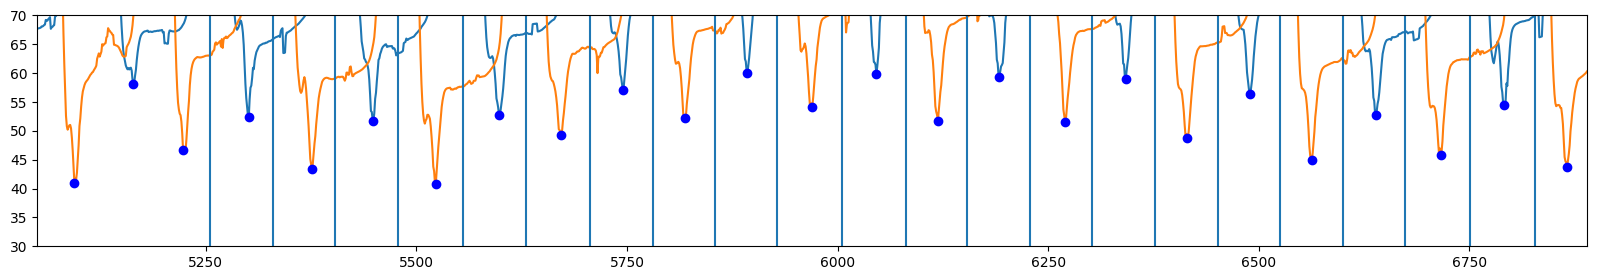

In [73]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
plt.vlines(m2[0],0,500)
plt.ylim([30, 70])
plt.xlim([m2_start-20, m2_end+20])

# P7 - M3

In [74]:
m3_start = start_music[start_music[0]=='P6_M3'][1].item()
m3_end = m3[0].max()
print(m3_start)
print(m3_end)

7420.0
9471.9863946


In [75]:
beats_in_m3_range = m3[(m3[0]>=m3_start) & (m3[0]<=m3_end)][0] 
steps_in_m3_range = steps.loc[(steps[0] >= m3_start) & (steps[0] <= m3_end)][0]

In [76]:
#all MUSIC M1
beats_in_m3_range.count()/((beats_in_m3_range.max()-beats_in_m3_range.min())/100/60)

95.70312499909551

In [77]:
#all WALKING M3
steps_in_m3_range.count()/((m3_end-m3_start)/100/60)

93.56787184616158

In [78]:
after3W = steps_in_m3_range[steps_in_m3_range >= steps_in_m3_range.min()+300]

In [79]:
after3M = beats_in_m3_range[beats_in_m3_range >= beats_in_m3_range.min()+300]

In [80]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

96.37120761451519

In [81]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

96.38966104748079

(7400.0, 9491.9863946)

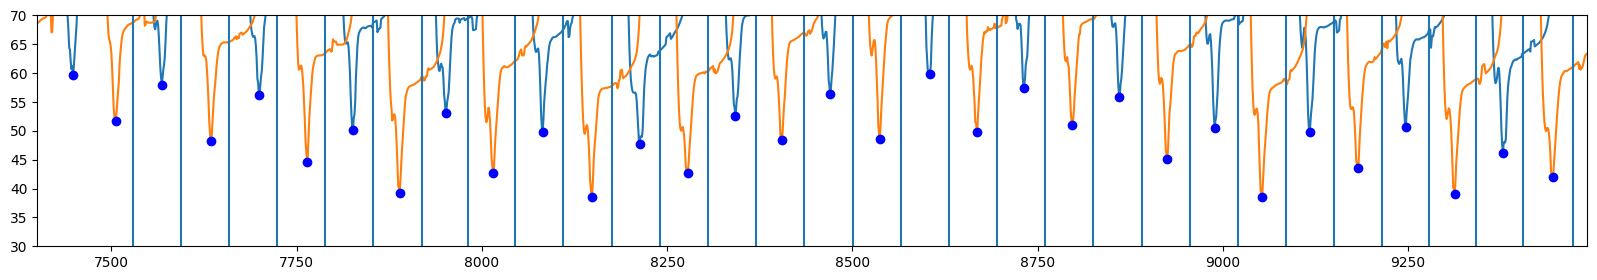

In [83]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m3[0],0,500)
plt.ylim([30, 70])
plt.xlim([m3_start-20, m3_end+20])